# Agent based modelling training

Welcome to this training - this will go through the basics of agent based modelling, reinforcement learning, and the AIGym API

These systems are very different to traditional data-style problems - your interaction with the environment and how you use the resulting data is key.

A key component of this is the concept of **exploration** vs **exploitation** - should you look for a better way of doing things, or keep doing the same? A great example of this is one-armed bandits:

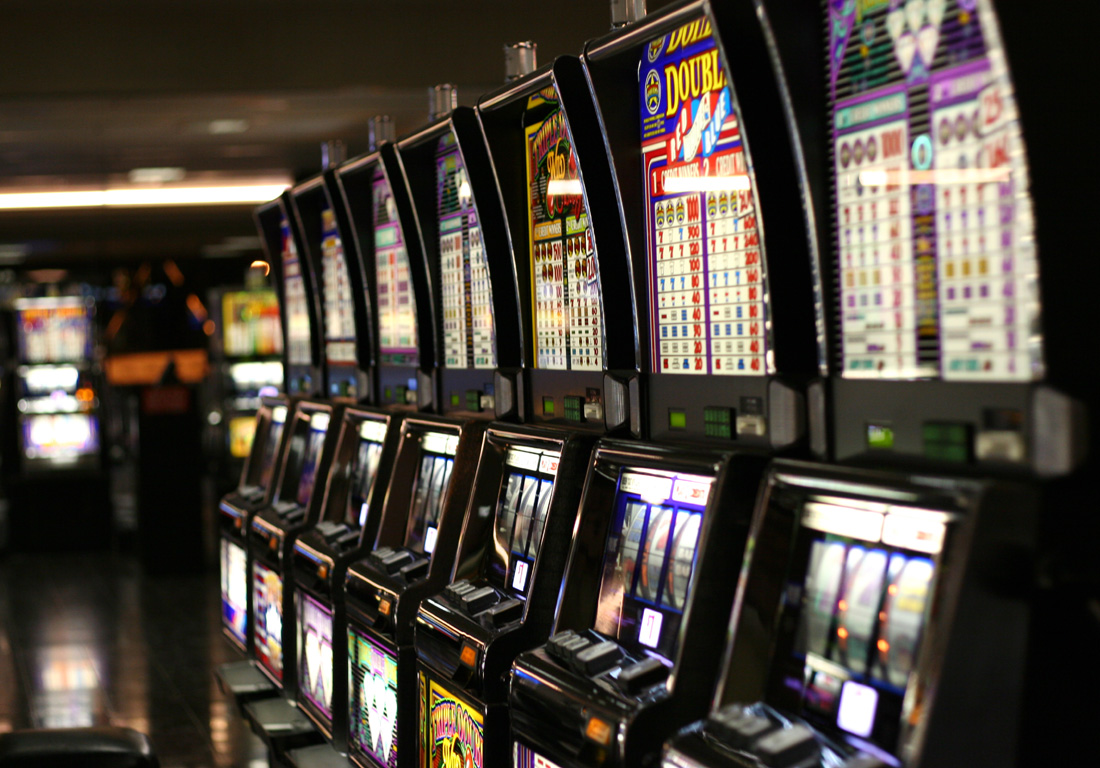

Let's say there's 5 bandits - each play costs 1 coin, and you can win 2, 5, or 10 coins. The probabilty of winning is different for each bandit. So for example:
- 60% you win nothing (lose 1 coin)
- 25% you win 2 coins
- 10% you win 5 coins 
- 5% you win 10 coins




Given 100 goes, what would the optimal strategy be?
First let's create the environment:

In [1]:
import random
import numpy as np
import pandas as pd

class OneArmedBandit():
    def __init__(self, number_of_machines=5):
        self.machine_odds = []
        self.payoff = [-1,2,5,10]
        self.number_of_machines = 5

    
    def reset(self):
        for n in range(self.number_of_machines):
            self.machine_odds.append(np.random.dirichlet(np.ones(4),size=1)[0])
    
    def step(self, machine_number):
        return np.random.choice(self.payoff, p=self.machine_odds[int(machine_number)])
        
            
            
            

Let's now play randomly. Note the reset() method generates new probabilities

In [2]:
env = OneArmedBandit(number_of_machines = 5)

env.reset()

results = []
for n in range(100):
    machine_selection = random.choice([0,1,2,3,4])
    payoff = env.step(machine_selection)
    #print(f"Round {n} - machine {machine_selection} selected - payoff {payoff}")
    results.append({"round":n, "machine":machine_selection, "payoff":payoff})


results_df = pd.DataFrame(results)
print("Final payoff was - ", results_df['payoff'].sum())


Final payoff was -  402


Let's look at the average payoff per machine

<Axes: ylabel='machine'>

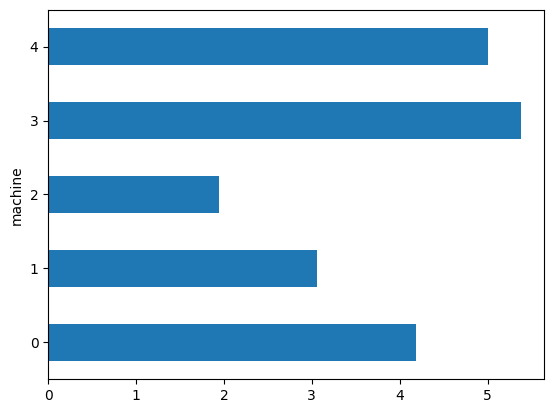

In [3]:
results_df.groupby('machine').mean()['payoff'].plot(kind='barh')

How would you develop a more intelligent agent? Can you use the information  Try below

In [4]:
results = []
for n in range(100):
    
    ### your code lives here
    machine_selection = random.choice([0,1,2,3,4])
    
    
    ### ends here
    
    payoff = env.step(machine_selection)
    #print(f"Round {n} - machine {machine_selection} selected - payoff {payoff}")
    results.append({"round":n, "machine":machine_selection, "payoff":payoff})


results_df = pd.DataFrame(results)
print("Final payoff was - ", results_df['payoff'].sum())

Final payoff was -  319


How did you do? There are some example solutions at the bottom of the document
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
Examples

In [5]:
env = OneArmedBandit(number_of_machines = 5)

env.reset()


In [6]:
# random agent
results = []
for n in range(100):
    machine_selection = random.choice([0,1,2,3,4])
    payoff = env.step(machine_selection)
    #print(f"Round {n} - machine {machine_selection} selected - payoff {payoff}")
    results.append({"round":n, "machine":machine_selection, "payoff":payoff})


random_results_df = pd.DataFrame(results)
print("Final payoff was - ", random_results_df['payoff'].sum())

Final payoff was -  306


### One approach is purely algorithmic - sample for a set amount of time (exploration), then pivot and just pick the best machine for the rest of the time (exploitation)
Exploration is controlled via the number of steps (in this case 30)

In [7]:
# algorithmic approach
# sample randomly for first 30 steps, then pick the best one after that
# random agent
results = []
for n in range(100):
    if n < 30:
        machine_selection = random.choice([0,1,2,3,4])
    else:
        algo_results_df = pd.DataFrame(results)
        machine_selection = algo_results_df.groupby('machine').mean().idxmax()[0]
    
    payoff = env.step(machine_selection)
    #print(f"Round {n} - machine {machine_selection} selected - payoff {payoff}")
    results.append({"round":n, "machine":machine_selection, "payoff":payoff})


random_results_df = pd.DataFrame(results)
print("Final payoff was - ", random_results_df['payoff'].sum())

Final payoff was -  280


### Another approach is a stochastic one - always picking the bandit randomly, but updating the probability of picking a bandit based on if the current payoff is larger or smaller than the average score. 
\
Exploration is controlled via epsilon - make it smaller and the updates to the probabilties are smaller, larger and the updates are bigger. Epsilon set to 1 would act in the same way as the random agent

In [8]:
# stochastic approach

results = []    

score = 0
proba = np.array([1 / 5 for n in range(5)])
for n in range(100):
    # The stochastic solution always samples randomly but updates a probability distribution each time

    machine_selection = int(np.random.choice([n for n in range(5)], p=proba))
    payoff = env.step(machine_selection)

    score += payoff

    avg_score = score / (n + 1)

    epsilon = 1.5
    if payoff > avg_score:
        proba[machine_selection] = proba[machine_selection] * epsilon
    elif payoff < avg_score:
        proba[machine_selection] = proba[machine_selection] / epsilon
    # standardise to 1
    proba = proba * (1 / proba.sum())
    #print(proba)
    
    #print(f"Round {n} - machine {machine_selection} selected - payoff {payoff}")
    results.append({"round":n, "machine":machine_selection, "payoff":payoff})


random_results_df = pd.DataFrame(results)
print("Final payoff was - ", random_results_df['payoff'].sum())

Final payoff was -  444
